In [13]:
! pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/d9/91/007a0d60fee8db4f7385075dc50bf62d2d359b417b374ec06b06ce6c2d64/mysql_connector_python-8.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/15.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.4 MB 660.6 kB/s eta 0:00:24
    --------------------------------------- 0.3/15.4 MB 3.2 MB/s eta 0:00:05
   - -------------------------------------- 0.6/15.4 MB 4.8 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/15.4 MB 5.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/15.4 MB 6.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.4 MB 6.7 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/15.4 MB 6.9 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/15.4 MB 7.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/15.4 MB 6.3 MB/s eta 0:00:

In [14]:
! pip install psycopg2-binary

  Obtaining dependency information for psycopg2-binary from https://files.pythonhosted.org/packages/25/1f/7ae31759142999a8d06b3e250c1346c4abcdcada8fa884376775dc1de686/psycopg2_binary-2.9.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.2 MB 2.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.2 MB 4.3 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 5.7 MB/s eta 0:00:00


In [66]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Godisgood",
    database = "health_data"
)

mycursor = db.cursor()
print(db)

In [29]:
mycursor.execute("select * from health_data.ocd_patient_dataset")

output = mycursor.fetchall()

for x in output:
    print(x)

(1018, 32, 'Female', 'African', 'Single', 'Some College', '2016-07-15', 203, 'MDD', 'No', 'Harm-related', 'Checking', 17, 10, 'Yes', 'Yes', 'SNRI')
(2406, 69, 'Male', 'African', 'Divorced', 'Some College', '2017-04-28', 180, 'None', 'Yes', 'Harm-related', 'Washing', 21, 25, 'Yes', 'Yes', 'SSRI')
(1188, 57, 'Male', 'Hispanic', 'Divorced', 'College Degree', '2018-02-02', 173, 'MDD', 'No', 'Contamination', 'Checking', 3, 4, 'No', 'No', 'Benzodiazepine')
(6200, 27, 'Female', 'Hispanic', 'Married', 'College Degree', '2014-08-25', 126, 'PTSD', 'Yes', 'Symmetry', 'Washing', 14, 28, 'Yes', 'Yes', 'SSRI')
(5824, 56, 'Female', 'Hispanic', 'Married', 'High School', '2022-02-20', 168, 'PTSD', 'Yes', 'Hoarding', 'Ordering', 39, 18, 'No', 'No', 'None')
(6946, 32, 'Female', 'Asian', 'Married', 'College Degree', '2016-06-25', 46, 'GAD', 'No', 'Hoarding', 'Ordering', 26, 11, 'Yes', 'Yes', 'SSRI')
(9861, 38, 'Female', 'Hispanic', 'Single', 'College Degree', '2017-03-13', 110, 'MDD', 'No', 'Contamination

In [39]:
query = "select * from health_data.ocd_patient_dataset"

df = pd.read_sql(query, db)

In [40]:
# view the dataset
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


# Exploratory Data Analysis

In [41]:
df.shape

(1500, 17)

In [42]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')

In [43]:
df.info

<bound method DataFrame.info of       Patient ID  Age  Gender  Ethnicity Marital Status  Education Level  \
0           1018   32  Female    African         Single     Some College   
1           2406   69    Male    African       Divorced     Some College   
2           1188   57    Male   Hispanic       Divorced   College Degree   
3           6200   27  Female   Hispanic        Married   College Degree   
4           5824   56  Female   Hispanic        Married      High School   
...          ...  ...     ...        ...            ...              ...   
1495        5374   38    Male   Hispanic       Divorced   College Degree   
1496        5013   19  Female   Hispanic       Divorced  Graduate Degree   
1497        6089   40    Male      Asian        Married     Some College   
1498        3808   37  Female  Caucasian        Married     Some College   
1499        2221   18    Male  Caucasian         Single      High School   

     OCD Diagnosis Date  Duration of Symptoms (months) 

In [81]:
df.isna()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
df.loc[df.duplicated()]

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications


In [44]:
df.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [45]:
#change decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [46]:
#missing values
df.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

In [47]:
df.nunique()

Patient ID                       1393
Age                                58
Gender                              2
Ethnicity                           4
Marital Status                      3
Education Level                     4
OCD Diagnosis Date               1218
Duration of Symptoms (months)     235
Previous Diagnoses                  5
Family History of OCD               2
Obsession Type                      5
Compulsion Type                     5
Y-BOCS Score (Obsessions)          41
Y-BOCS Score (Compulsions)         41
Depression Diagnosis                2
Anxiety Diagnosis                   2
Medications                         4
dtype: int64

In [52]:
df.sort_values(by="Gender").head(20)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
595,4862,62,Female,Hispanic,Divorced,Some College,2015-11-30,75,GAD,No,Hoarding,Checking,11,12,Yes,Yes,None
596,1815,31,Female,Asian,Single,Some College,2015-10-28,230,None,Yes,Religious,Counting,16,22,Yes,No,Benzodiazepine
597,3994,29,Female,Asian,Single,Graduate Degree,2020-04-07,59,MDD,Yes,Harm-related,Counting,15,17,No,Yes,None
1204,8406,33,Female,African,Single,Some College,2017-02-24,231,Panic Disorder,Yes,Contamination,Counting,23,29,No,Yes,SNRI
1203,5759,57,Female,African,Married,Some College,2016-03-31,75,PTSD,Yes,Contamination,Washing,6,23,Yes,No,Benzodiazepine
601,2255,25,Female,African,Divorced,College Degree,2021-01-07,76,GAD,No,Symmetry,Ordering,17,3,Yes,No,None
1202,8885,41,Female,Asian,Married,Some College,2018-04-17,74,Panic Disorder,No,Hoarding,Checking,39,36,Yes,No,SNRI
603,5772,66,Female,Hispanic,Married,Graduate Degree,2018-07-15,169,GAD,No,Symmetry,Washing,27,1,No,No,None
1201,5272,55,Female,Hispanic,Single,High School,2021-11-05,218,GAD,Yes,Symmetry,Ordering,20,19,No,Yes,SNRI


In [51]:
df.sort_values(by="Y-BOCS Score (Obsessions)", ascending=False)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
48,2169,31,Female,African,Single,College Degree,2020-03-29,59,MDD,Yes,Hoarding,Washing,40,32,No,Yes,None
183,1959,68,Male,African,Married,Graduate Degree,2016-02-02,66,PTSD,Yes,Religious,Checking,40,10,No,Yes,SNRI
1353,3388,74,Male,African,Married,High School,2020-06-21,228,None,No,Symmetry,Ordering,40,39,Yes,Yes,SNRI
505,6129,65,Male,African,Divorced,High School,2015-12-19,140,PTSD,Yes,Hoarding,Counting,40,14,No,Yes,SSRI
216,1185,28,Female,Caucasian,Divorced,High School,2019-03-16,238,PTSD,No,Harm-related,Ordering,40,14,Yes,No,Benzodiazepine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,3142,72,Female,Caucasian,Divorced,Some College,2020-03-19,33,Panic Disorder,Yes,Religious,Counting,0,20,No,Yes,None
368,9317,74,Male,Asian,Single,Some College,2016-01-20,128,PTSD,Yes,Religious,Counting,0,29,Yes,No,SSRI
1298,8946,64,Female,African,Divorced,Some College,2017-06-10,226,MDD,No,Contamination,Washing,0,7,Yes,Yes,None
519,7818,75,Male,Caucasian,Married,Graduate Degree,2020-03-29,56,PTSD,No,Harm-related,Ordering,0,12,Yes,Yes,Benzodiazepine


# DATA CLEANING

In [76]:
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

In [77]:
#changing datetype
pd.to_datetime(df['OCD Diagnosis Date'])

0      2016-07-15
1      2017-04-28
2      2018-02-02
3      2014-08-25
4      2022-02-20
          ...    
1495   2019-01-10
1496   2022-09-14
1497   2018-03-13
1498   2018-04-14
1499   2020-12-23
Name: OCD Diagnosis Date, Length: 1500, dtype: datetime64[ns]

In [78]:
df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'])

In [ ]:
#if changing to numeric e.g.
pd.to_numeric(df['Age'])

#if renaming column name
df.rename(columns={'Medications':'Meds',
                  'Duration of Symtoms (months)' : 'Sx Duration'})

In [85]:
df['Gender'].value_counts()

Gender
Male      753
Female    747
Name: count, dtype: int64

In [106]:
df['Gender'].value_counts()/df['Y-BOCS Score (Obsessions)'].mean()

Gender
Male     37.56
Female   37.26
Name: count, dtype: float64

Text(0.5, 1.02, 'Count of Ethnicity')

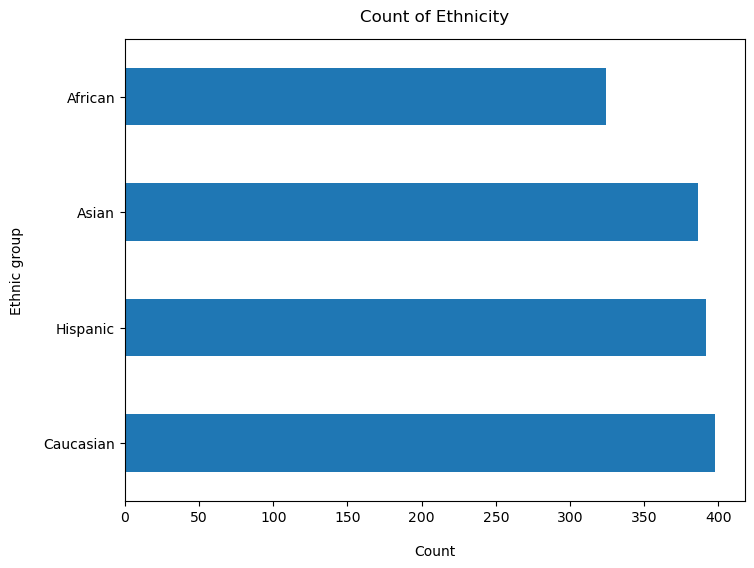

In [144]:
df['Ethnicity'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Ethnic group', labelpad=14)
plt.title("Count of Ethnicity", y=1.02)

<Axes: ylabel='Frequency'>

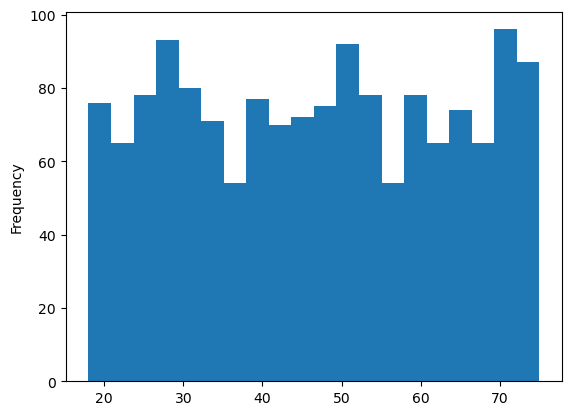

In [124]:
df['Age'].plot(kind='hist', bins=20)

<Axes: xlabel='Duration of Symptoms (months)', ylabel='Family History of OCD'>

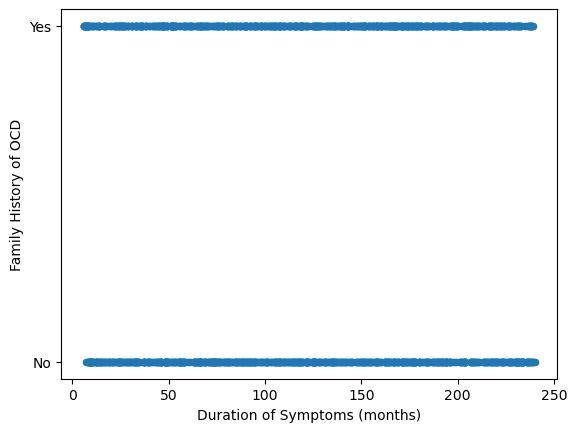

In [168]:
df.plot(kind='scatter', x='Duration of Symptoms (months)',
       y='Family History of OCD')

In [132]:
df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [ ]:
sns.scatterplot(x= 'Y-BOCS Score (Obsessions),
                y = 'Previous Diagnoses')